# Final Project Report

* Class: DS 5100
* Student Name: Will Sivolella
* Student Net ID: wjs3jc
* This URL: https://github.com/WillSivolella/wjs3jc_ds5100_montecarlo/blob/main/FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/WillSivolella/wjs3jc_ds5100_montecarlo/tree/main

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import pandas as pd
import numpy as np
from collections import Counter

class Die:
    '''The Die class is used to create Die objects, which have declared sides and weights for each side'''
    def __init__(self, faces):
        '''The __init__ method instantiates objects of the Die class using the specified "faces" and sets the weights to 1.0 by default'''
        '''faces (argument of type NumPy Array): contains all the sides to the die'''
        '''weights (attribute of type float): each face has a corresponding weight, which defaults to 1 and defines how much a side is favored'''
        '''die_df (attribute): a dataframe with an index of the faces and a column containing the corresponding weights'''
        if not isinstance(faces, np.ndarray):
            raise TypeError("Argument must be of type np.array.")
        if len(np.unique(faces)) != len(faces):
            raise ValueError("Values in array are not unique.")
                
        self.faces = faces
        self.weights = np.ones(len(faces))
        self.die_df = pd.DataFrame({'weight' : self.weights}, self.faces)
            
    def set_weight(self, f_val, wt):
        '''set_weight take input arguments f_val and wt and allows the user to change the weight of a specific side for a specific object of the Die class'''
        '''f_val (argument of type string or numeric): the side with the corresponding wieght that the user wishes to chance'''
        '''wt (argument of type string or numeric): the new weight value the user wishes to set for the specified side'''
        if f_val not in self.faces:
            raise IndexError("Index is not valid.")
        if (type(wt) != str) & (type(wt) != float) & (type(wt) != int):
            raise ValueError("Weight entered is not a valid data type.")
                
        wt_cast = float(wt)
        self.die_df.loc[f_val] = wt_cast
        self.weights = self.die_df['weight'].values
            
    def roll_die(self, rolls = 1):
        '''The roll_die method takes input argument rolls and returns a list of simulated dice rolls based on the faces and corresponding wieghts of the object'''
        '''rolls (argument of type integer) specifies the amount of times the user wishes to roll the Die object'''
        results = list(self.die_df.sample(n=rolls, weights='weight', replace=True).index)
        return results
            
    def get_df(self):
        '''The get_df method returns the attribute self_df, which is a dataframe that containes the faces and weights of the object'''
        return self.die_df.copy()
        
class Game:
    '''The Game class creates objects using objects of the Die class and contains methods that display the results of the specified amount of rolls for each Die object involved in the "game"'''
    def __init__(self, d_list):
        '''The __init__ method has an argument d_list, which is a list of objects of the Die class, and initializes objects of the Game class, which have attributes d_list and game_df'''
        '''d_list (argument of type list): list of Die objects used for the Game object'''
        '''game_df (attribute of type dataframe): shows the results of each roll of a the objects in d_list'''
        self.d_list = d_list
        self.game_df = None
            
    def play(self, rolls):
        '''The play method takes the integer rolls as an argument, which specifies how many times each dice is rolled and sets game_df (wide by default) to the results'''
        '''rolls (argument of type ineger): specifies how many times each dice is rolled'''
        result_list = []
        col_names = []
        count = 1
        for i in self.d_list:
            result_list.append(i.roll_die(rolls))
            col_names.append(f"Object {count}")
            count += 1
        self.game_df = pd.DataFrame(result_list).T
        self.game_df.columns = col_names
            
    def get_recent_play(self, form = 'w'):
        '''The get_recent_play takes the string argument form and returns the game_df dataframe either in wide or narrow form'''
        '''form (argument of type string): specifies if the game_df should be in narrow or wide form (wide by default)'''
        if (form != 'w') & (form != 'n'):
            raise ValueError("Must input 'w' for wide or 'n' for narrow")
        if form == 'w':
            return self.game_df.copy()
        elif form == 'n':
            game_df_narrow = pd.melt(self.game_df, var_name = 'Die Object', value_name = 'Results')
            return game_df_narrow.copy()
        
        
            
class Analyzer:
    '''The Analyzer class is used to create Analyzer objects, which take the results of a single game and computes various descriptive statistical properties about it.'''
    def __init__(self, g_obj):
        '''The __init__ method take thes argument g_obj and instantiates objects of the Analyzer class'''
        '''g_obj (argument and object of Game class): the specified Game object the user wishes to analyze'''
        if not isinstance(g_obj, Game):
            raise ValueError("Object passed must be an object of the Game class.")
        self.g_obj = g_obj
            
    def jackpot(self):
        '''The jackpot method takes no arguments and return the integer count of scenarios where all die rolled the same "face" during the same roll'''
        count = 0
        for i in range(len(self.g_obj.get_recent_play())):
            if len(set(list(self.g_obj.get_recent_play().loc[i]))) == 1:
                count += 1
        return count

    def fc_roll(self):
        '''The fc_roll method computes how many times a given face is rolled in each event and returns the result as a dataframe'''
        roll_counts = self.g_obj.get_recent_play().apply(lambda r: r.value_counts(), axis=1).fillna(0).astype(int)
        return roll_counts
        
    def combo_count(self):
        '''The combo_count method computes the distinct combinations of faces rolled, along with their counts and returns a dataframe of the results'''
        combo_counts = pd.DataFrame(Counter(tuple(sorted(r)) for _, r in \
                                                self.g_obj.get_recent_play().iterrows()),index=['Combo Counts']).T
        return combo_counts
        
    def perm_count(self): 
        '''The perm_count method computes the distinct permutations of faces rolled, along with their counts and returns a dataframe of the results'''
        perm_counts = pd.DataFrame(Counter(tuple(r) for _, r in \
                                                self.g_obj.get_recent_play().iterrows()),index=['Perm Counts']).T
        return perm_counts
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import pandas as pd
import numpy as np
from collections import Counter
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class MontecarloTestSuite(unittest.TestCase):
    
    def test_1__init__Die(self): 
        #Create an object the __init__ method of the Die class and see if the dataframe created is the right shape and type
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        #Expect 6 rows for each face and 1 column for the weights; face labels are indecies
        expected = (6,1)
        self.assertEqual(die_obj1.die_df.shape, expected)
        
    def test_2_set_weight(self):
        #Change weight of a side of the die object and see if it works
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj1.set_weight(3,5.0)
        expected = 5.0
        self.assertEqual(die_obj1.weights[2], expected)
        
    def test_3_roll_die(self): 
        #Call the roll_die method on the Die object and see if it returns a list
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        result = die_obj1.roll_die()
        self.assertIsInstance(result, list)
        
        
    def test_4_get_df(self): 
        #Call the get_df method on Die object and see if it returns an object of type pd.DataFrame
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        result = die_obj1.get_df()
        self.assertIsInstance(result, pd.DataFrame)
        
    def test_5_num__init__Game(self): 
        #Create and object and see if it is an object of the Game class
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        die_list = [die_obj1, die_obj2]
        g_obj1 = Game(die_list)
        #Expect the length of d_list for the Game object to be 2, which are the number of die objects in the game
        expected = 2
        self.assertEqual(len(g_obj1.d_list), expected) 

    def test_6_play(self):
        #Call play method with 5 rolls on Game object and see if it updates the dataframe to a dataframe with 5 rows
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        die_list = [die_obj1, die_obj2]
        g_obj1 = Game(die_list)
        g_obj1.play(100)
        expected = 100
        self.assertEqual(len(g_obj1.game_df), expected)
        
    def test_7_get_recent_play_wide(self):
        #Call get_recent_play method with default argument and see if it returns a wide dataframe
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        die_obj3 = Die(faces = die_list)
        die_list = [die_obj1, die_obj2, die_obj3]
        g_obj1 = Game(die_list)
        g_obj1.play(10)
        self.assertTrue(g_obj1.get_recent_play().shape[1] > 2)

    def test_8_get_recent_play_narrow(self):
        #Call get_recent_play method with default 'n' argument and see if it returns a narrow dataframe
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        die_obj3 = Die(faces = die_list)
        die_list = [die_obj1, die_obj2, die_obj3]
        g_obj1 = Game(die_list)
        g_obj1.play(10)
        self.assertTrue(g_obj1.get_recent_play('n').shape[1] == 2 and "Results" in g_obj1.get_recent_play('n').columns)
        
    def test_9__init__Analyzer(self):
        #Creates an object and sees if the game object attribute is of the Game class
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        die_obj3 = Die(faces = die_list)
        die_list = [die_obj1, die_obj2, die_obj3]
        g_obj1 = Game(die_list)
        g_obj1.play(10)
        a_obj1 = Analyzer(g_obj1)
        result = a_obj1.g_obj
        self.assertIsInstance(result, Game)
        
    def test_10_jackpot(self):
        #Calls jackpot on Analyzer Object and sees if it returns the correct amount of jackpots
        #Because the dice are so heavily weighted to the same side we should expect a jackpot for every roll
        die_list = np.array([1,2])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        
        die_obj1.set_weight(1, 10000)
        die_obj2.set_weight(1, 10000)
        
        die_list = [die_obj1, die_obj2]
        g_obj1 = Game(die_list)
        g_obj1.play(5)
        a_obj1 = Analyzer(g_obj1)
        expected = 5
        self.assertEqual(a_obj1.jackpot(), expected)
        
    def test_11_fc_roll(self):
        #Calls fc_roll on Analyzer object and sees if it returns a dataframe
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        die_obj3 = Die(faces = die_list)
        die_list = [die_obj1, die_obj2, die_obj3]
        g_obj1 = Game(die_list)
        g_obj1.play(10)
        a_obj1 = Analyzer(g_obj1)
        result = a_obj1.fc_roll()
        self.assertIsInstance(result, pd.DataFrame)
    
    def test_12_combo_count(self):
        # add some books with ratings to the list, making sure some of them have rating > 3. 
        # Your test should check that the returned books have rating  > 3
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        die_obj3 = Die(faces = die_list)
        die_list = [die_obj1, die_obj2, die_obj3]
        g_obj1 = Game(die_list)
        g_obj1.play(10)
        a_obj1 = Analyzer(g_obj1)
        result = a_obj1.combo_count()
        self.assertIsInstance(result, pd.DataFrame)
        
    def test_13_perm_count(self):
        # add some books with ratings to the list, making sure some of them have rating > 3. 
        # Your test should check that the returned books have rating  > 3
        die_list = np.array([1,2,3,4,5,6])
        die_obj1 = Die(faces = die_list)
        die_obj2 = Die(faces = die_list)
        die_obj3 = Die(faces = die_list)
        die_list = [die_obj1, die_obj2, die_obj3]
        g_obj1 = Game(die_list)
        g_obj1.play(10)
        a_obj1 = Analyzer(g_obj1)
        result = a_obj1.perm_count()
        self.assertIsInstance(result, pd.DataFrame)
        
        
                
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
    
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
PS C:\Users\student\OneDrive\Documents\DS 5100\FinalProject> python montecarlo_test.py
test_10_jackpot (__main__.MontecarloTestSuite) ... ok
test_11_fc_roll (__main__.MontecarloTestSuite) ... ok
test_12_combo_count (__main__.MontecarloTestSuite) ... ok
test_13_perm_count (__main__.MontecarloTestSuite) ... ok
test_1__init__Die (__main__.MontecarloTestSuite) ... ok
test_2_set_weight (__main__.MontecarloTestSuite) ... ok
test_3_roll_die (__main__.MontecarloTestSuite) ... ok
test_4_get_df (__main__.MontecarloTestSuite) ... ok
test_5_num__init__Game (__main__.MontecarloTestSuite) ... ok
test_6_play (__main__.MontecarloTestSuite) ... ok
test_7_get_recent_play_wide (__main__.MontecarloTestSuite) ... ok
test_8_get_recent_play_narrow (__main__.MontecarloTestSuite) ... ok
test_9__init__Analyzer (__main__.MontecarloTestSuite) ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.050s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
# e.g. import montecarlo.montecarlo 
import montecarlo
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(g_obj)
     |  
     |  The Analyzer class is used to create Analyzer objects, which take the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, g_obj)
     |      The __init__ method take thes argument g_obj and instantiates objects of the Analyzer class
     |  
     |  combo_count(self)
     |      The combo_count method computes the distinct combinations of faces rolled, along with their counts and returns a dataframe of the results
     |  
     |  fc_roll(self)
     |      The fc_roll method computes how many times a given face is rolled in each event and returns the result as a dataframe
     |  
     |  jackpot(self)
     |      The jackpot method takes no arguments and return the integer count 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/WillSivolella/wjs3jc_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/wjs3jc/wjs3jc_ds5100_montecarlo
Obtaining file:///sfs/qumulo/qhome/wjs3jc/wjs3jc_ds5100_montecarlo
Obtaining file:///sfs/qumulo/qhome/wjs3jc/wjs3jc_ds5100_montecarlo
Collecting install
  Downloading install-1.3.0.tar.gz (1.8 kB)
Requirement already satisfied: pandas>=0.2 in /sfs/qumulo/qhome/wjs3jc/.local/lib/python2.7/site-packages (from montecarlo==0.1.0) (0.24.2)
Requirement already satisfied: numpy>=1.12.0 in /sfs/qumulo/qhome/wjs3jc/.local/lib/python2.7/site-packages (from pandas>=0.2->montecarlo==0.1.0) (1.16.
6)
Requirement already satisfied: python-dateutil>=2.5.0 in /sfs/qumulo/qhome/wjs3jc/.local/lib/python2.7/site-packages (from pandas>=0.2->montecarlo==0.1.
0) (2.8.2)
Requirement already satisfied: pytz>=2011k in /usr/lib/python2.7/site-packages (from pandas>=0.2->montecarlo==0.1.0) (2016.10)
Requirement already satisfied: six>=1.5 in /usr/lib/python2.7/site-packages (from python-dateutil>=2.5.0->pandas>=0.2->montecarlo==0.1.0) (1.9.0)
Building wheels for collected packages: install
  Building wheel for install (setup.py) ... done
  Created wheel for install: filename=install-1.3.0-py2-none-any.whl size=2080 sha256=3aef628f70dadec817eaeb3606923d6604a08937c87291b86d1fa7a40622f6aa
  Stored in directory: /sfs/qumulo/qhome/wjs3jc/.cache/pip/wheels/4d/68/70/655843d040bfbe474648930a48ae0febd1b5ee06295690794f
Successfully built install
Installing collected packages: install, montecarlo
  Running setup.py develop for montecarlo
Successfully installed install-1.3.0 montecarlo
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
coin_face = np.array(['H','T'])
fair_coin = Die(faces = coin_face)

unfair_coin = Die(faces = coin_face)
unfair_coin.set_weight('T', 5.0)

print("Fair Coin: \n", fair_coin.get_df())
print("\nUnfair Coin: \n", unfair_coin.get_df())

Fair Coin: 
    weight
H     1.0
T     1.0

Unfair Coin: 
    weight
H     1.0
T     5.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
d_list = [fair_coin, fair_coin]

g_obj1 = Game(d_list)
g_obj1.play(1000)
g_obj1.get_recent_play()

,Object 1,Object 2
0,T,T
1,T,H
2,H,H
3,H,T
4,T,H
...,...,...
995,H,H
996,H,T
997,H,T
998,H,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
d_list = [fair_coin, unfair_coin, unfair_coin]

g_obj2 = Game(d_list)
g_obj2.play(1000)
g_obj2.get_recent_play()

,Object 1,Object 2,Object 3
0,T,T,T
1,H,T,T
2,T,T,T
3,T,T,T
4,H,T,T
...,...,...,...
995,H,T,T
996,T,T,T
997,T,T,T
998,T,T,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
a_obj1 = Analyzer(g_obj1)
print("Number of jackpots for first game object: ", a_obj1.jackpot())
a_obj2 = Analyzer(g_obj2)
print("Number of jackpots for second game object: ", a_obj2.jackpot())

Number of jackpots for first game object:  485
Number of jackpots for second game object:  362


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
print("Relative frequency of jackpots for first game object: ", float(a_obj1.jackpot())/1000)
print("Relative frequency of jackpots for second game object: ", float(a_obj2.jackpot())/1000)

Relative frequency of jackpots for first game object:  0.485
Relative frequency of jackpots for second game object:  0.362


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

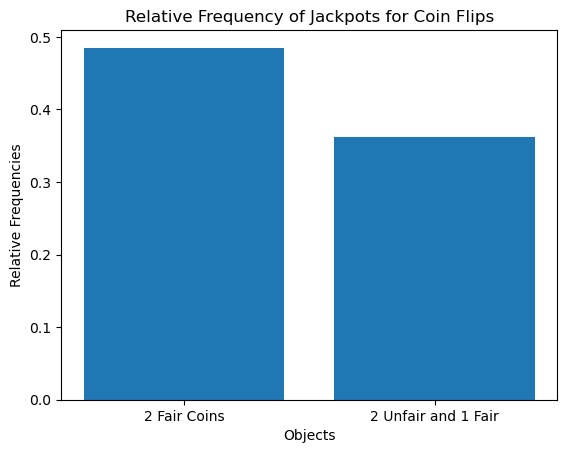

In [9]:
cols = ["2 Fair Coins", "2 Unfair and 1 Fair"]
vals = [float(a_obj1.jackpot())/1000, float(a_obj2.jackpot())/1000]
plt.bar(cols, vals)
plt.xlabel('Objects')
plt.ylabel('Relative Frequencies')
plt.title('Relative Frequency of Jackpots for Coin Flips')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [10]:
die_face = np.array([1,2,3,4,5,6])

die1 = Die(faces = die_face)
die2 = Die(faces = die_face)
die3 = Die(faces = die_face)

print("Die 1: \n", die1.get_df())
print("\nDie 2: \n", die2.get_df())
print("\nDie 3: \n", die3.get_df())

Die 1: 
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0

Die 2: 
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0

Die 3: 
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [11]:
die3.set_weight(6,5.0)
print("Die 3: \n", die3.get_df())

Die 3: 
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [12]:
die2.set_weight(1,5.0)
print("Die 3: \n", die2.get_df())

Die 3: 
    weight
1     5.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [13]:
d_list = [die1, die1, die1, die1, die1]

g_obj1 = Game(d_list)
g_obj1.play(10000)
g_obj1.get_recent_play()

,Object 1,Object 2,Object 3,Object 4,Object 5
0,2,1,3,4,3
1,5,4,3,6,4
2,6,3,2,1,2
3,3,3,2,1,1
4,1,6,4,4,2
...,...,...,...,...,...
9995,4,1,6,2,6
9996,5,2,4,5,2
9997,1,3,3,2,1
9998,1,3,5,6,2


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
d_list = [die2, die3, die1, die1, die1]

g_obj2 = Game(d_list)
g_obj2.play(10000)
g_obj2.get_recent_play()

,Object 1,Object 2,Object 3,Object 4,Object 5
0,3,3,1,3,4
1,1,6,5,5,5
2,1,6,1,6,5
3,5,6,1,2,6
4,3,6,1,4,6
...,...,...,...,...,...
9995,2,6,4,1,6
9996,3,6,1,6,5
9997,5,6,1,6,5
9998,2,5,1,5,5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

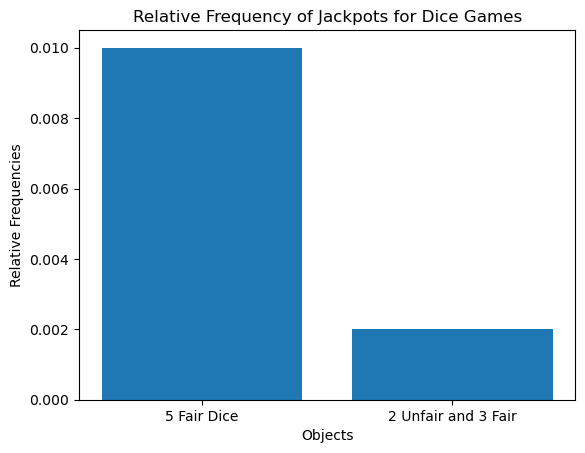

In [15]:
a_obj1 = Analyzer(g_obj1)
a_obj2 = Analyzer(g_obj2)
cols = ["5 Fair Dice", "2 Unfair and 3 Fair"]
vals = [float(a_obj1.jackpot())/1000, float(a_obj2.jackpot())/1000]
plt.bar(cols, vals)
plt.xlabel('Objects')
plt.ylabel('Relative Frequencies')
plt.title('Relative Frequency of Jackpots for Dice Games')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [16]:
df = pd.read_csv("english_letters.txt", header = None)

letters = []
counts = []
for i in range(len(df[0])):
    letters.append(df[0][i].split(" ")[0])
    counts.append(df[0][i].split(" ")[1])

letters_arr = np.array(letters)

die_obj1 = Die(faces = letters_arr)

for i in range(len(df[0])):
    die_obj1.set_weight(letters[i], counts[i])

die_obj1.get_df()

,weight
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [17]:
d_list = [die_obj1, die_obj1, die_obj1, die_obj1]

g_obj1 = Game(d_list)
g_obj1.play(1000)
g_obj1.get_recent_play()

,Object 1,Object 2,Object 3,Object 4
0,P,H,R,M
1,H,D,L,R
2,R,H,T,M
3,A,G,E,H
4,R,L,N,I
...,...,...,...,...
995,P,A,O,E
996,A,R,T,L
997,W,T,F,U
998,R,D,V,S


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [18]:
df2 = pd.read_csv("scrabble_words.txt", header = None)

a_obj1 = Analyzer(g_obj1)
perm_df = list(a_obj1.perm_count().index)
count = 0

for i in perm_df: 
    a_index = ''.join(i)
    if a_index in list(df2[0]):
        count += 1
print(count)

40


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [19]:
d_list = [die_obj1, die_obj1, die_obj1, die_obj1, die_obj1]

g_obj2 = Game(d_list)
g_obj2.play(1000)

a_obj2 = Analyzer(g_obj2)
perm_df = list(a_obj2.perm_count().index)
count2 = 0

for i in perm_df: 
    a_index = ''.join(i)
    if a_index in list(df2[0]):
        count2 += 1
print(count2)

8


The game object with 4 dice produced more permutations that are actual words than the game object with 5 dice.  The game object with 4 dice produced 40 permutations that are actual words, and the game object with 5 dice produced 8 permuations that are actual words.

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.